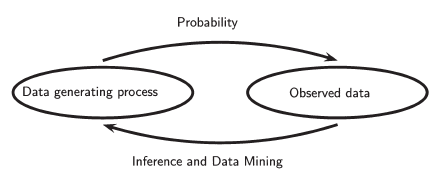

In [2]:
from PIL import Image
Image.open("image/Untitled.png")

- Probability is the formal language of uncertainty
- Exploratory data analysis uses concept of probability theory
- First step to inference and data mining

## Distributions - Theory

- Random draw, or realzations, from this distribution is the individual observation of data

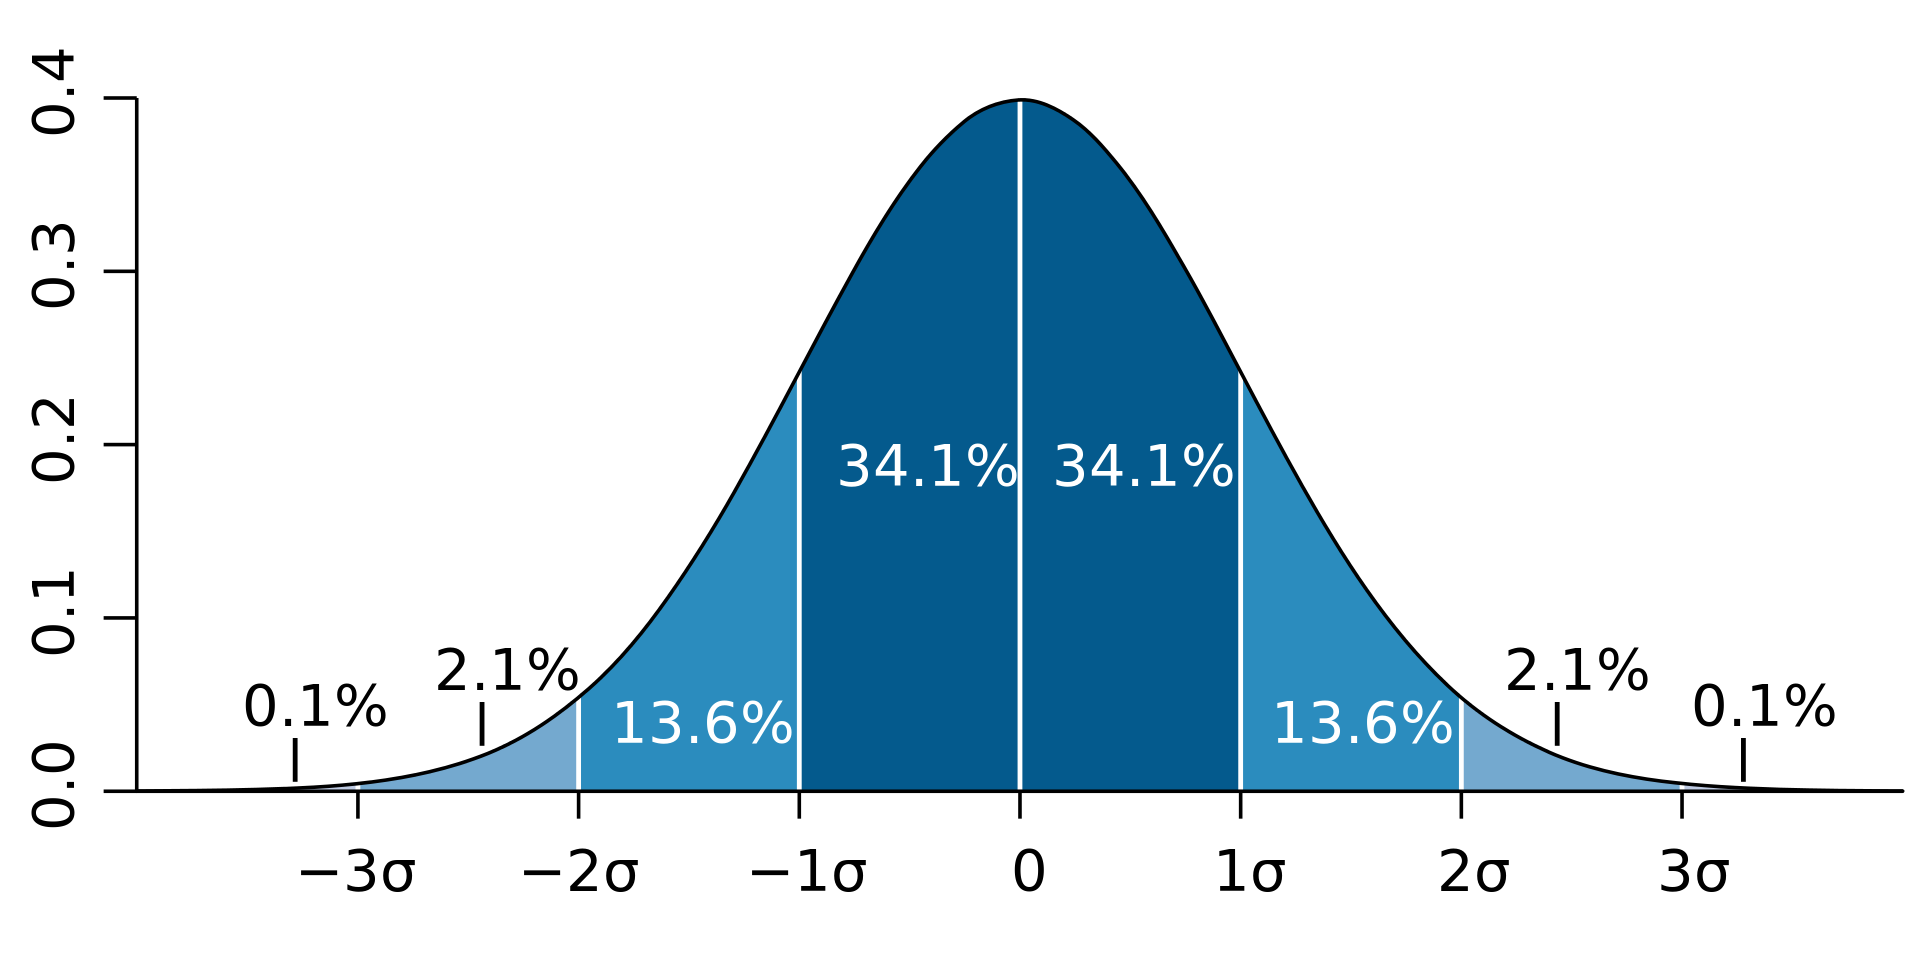

In [30]:
from PIL import Image
Image.open("image/Standard_deviation_diagram.svg.png")

## Histogram - Empirical

For all theoretical concepts, there exist an empirical counterpart

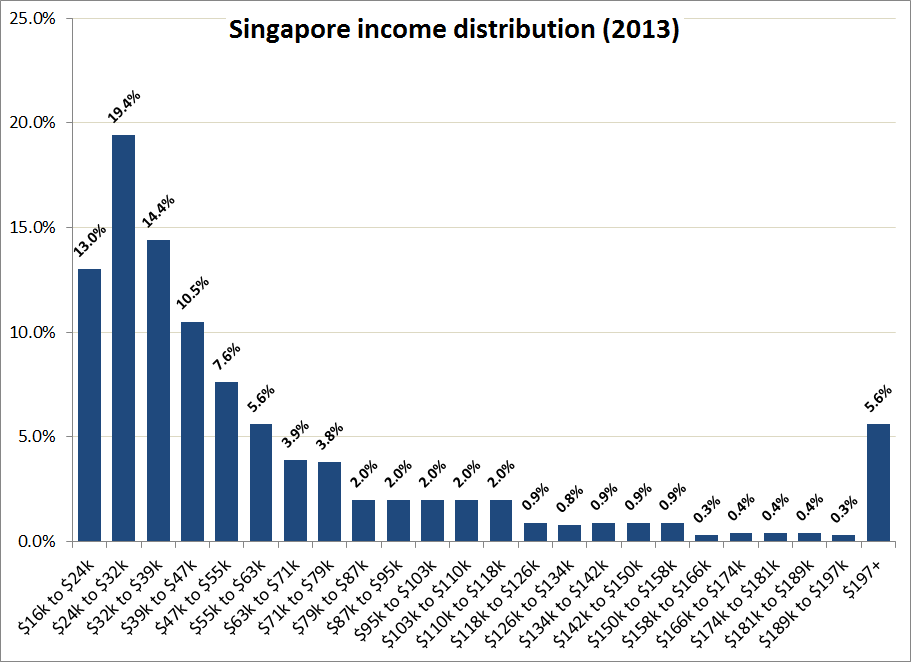

In [2]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("http://www.kailchan.ca/wp-content/uploads/2014/09/Income-distribution-Singapore-2013.bmp")
Image.open(BytesIO(response.content))

How do we draw histograms from the data?

In [3]:
import pandas as pd
df = pd.read_csv("data/multiTimeline.csv", skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,50
2004-03-01,72,26,45
2004-04-01,69,22,47
2004-05-01,73,22,43


(array([ 4.,  5.,  8., 10., 24., 33., 26., 13., 25., 18., 16.,  5.,  1.,
         5.,  2.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 34. ,  36.2,  38.4,  40.6,  42.8,  45. ,  47.2,  49.4,  51.6,
         53.8,  56. ,  58.2,  60.4,  62.6,  64.8,  67. ,  69.2,  71.4,
         73.6,  75.8,  78. ,  80.2,  82.4,  84.6,  86.8,  89. ,  91.2,
         93.4,  95.6,  97.8, 100. ]),
 <a list of 30 Patch objects>)

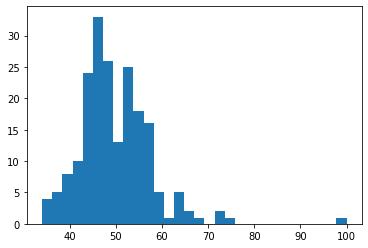

In [40]:
import matplotlib.pyplot as plt
plt.hist(df['diet'],bins=30)


## Other Data Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x28199781880>,
 'caps': [<matplotlib.lines.Line2D at 0x28199781ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28199781520>],
 'medians': [<matplotlib.lines.Line2D at 0x2819978c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x2819978c820>],
 'means': []}

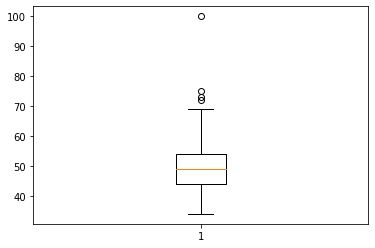

In [51]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['diet'])

# Explore the Data

- For each (random) variable, check
    - Variable types: string, numerical, date, and etc.
    - Summary statistics: min, max, mean, median, missing, and etc.
    - Through visualization, check outlier
- Between or among variables, check
    - Correlation
    - Can visualize through scatterplot, heatmap, and etc.

In [53]:
df.describe()

,diet,gym,finance
count,200.000000,200.000000,200.000000
mean,49.690000,37.310000,48.175000
std,7.956787,9.447762,5.743633
min,34.000000,22.000000,38.000000
25%,44.000000,29.000000,45.000000
50%,49.000000,36.000000,47.000000
75%,54.000000,46.000000,50.250000
max,100.000000,59.000000,76.000000


# Data Preparation
- Cleaning
- Transformation
    - Ex. Datetime or log transformation for highly skewed, such as wealth distribution
- Normalization/Scaling 
    - Ex. standardized test scores into percentiles
- Outlier Detection
- Imputation and Interpolation
- Merge

Case by case, we are going to have to use one or more of such tricks. 
Let's talk about your projects!

(array([ 5.,  1.,  7.,  7., 29.,  6.,  8.,  8., 17.,  6.,  5.,  4., 16.,
         5.,  3.,  4.,  5., 11.,  2.,  3.,  8.,  9.,  8.,  8.,  8.,  2.,
         0.,  0.,  1.,  4.]),
 array([22.        , 23.23333333, 24.46666667, 25.7       , 26.93333333,
        28.16666667, 29.4       , 30.63333333, 31.86666667, 33.1       ,
        34.33333333, 35.56666667, 36.8       , 38.03333333, 39.26666667,
        40.5       , 41.73333333, 42.96666667, 44.2       , 45.43333333,
        46.66666667, 47.9       , 49.13333333, 50.36666667, 51.6       ,
        52.83333333, 54.06666667, 55.3       , 56.53333333, 57.76666667,
        59.        ]),
 <a list of 30 Patch objects>)

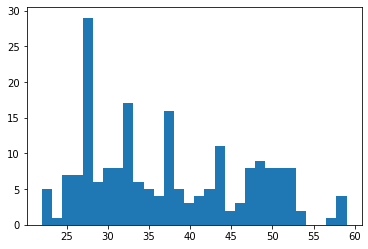

In [56]:
plt.hist(df['gym'],bins=30)

(array([ 2.,  3.,  1.,  7.,  0.,  7., 13., 16.,  6.,  8.,  8., 11.,  6.,
         6.,  9.,  5., 11.,  5.,  7.,  5.,  4.,  9.,  3., 14., 11.,  8.,
         8.,  2.,  1.,  4.]),
 array([3.09104245, 3.12392562, 3.15680879, 3.18969195, 3.22257512,
        3.25545829, 3.28834145, 3.32122462, 3.35410778, 3.38699095,
        3.41987412, 3.45275728, 3.48564045, 3.51852362, 3.55140678,
        3.58428995, 3.61717311, 3.65005628, 3.68293945, 3.71582261,
        3.74870578, 3.78158895, 3.81447211, 3.84735528, 3.88023845,
        3.91312161, 3.94600478, 3.97888794, 4.01177111, 4.04465428,
        4.07753744]),
 <a list of 30 Patch objects>)

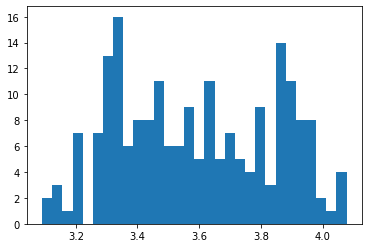

In [55]:
import numpy as np
plt.hist(np.log(df['gym']),bins=30)

In [63]:
df['gym'].mean()

37.31

In [70]:
temp = (df['gym']-df['gym'].mean())/df['gym'].std()
temp.describe()

count    2.000000e+02
mean    -1.376677e-16
std      1.000000e+00
min     -1.620490e+00
25%     -8.795734e-01
50%     -1.386572e-01
75%      9.197946e-01
max      2.295782e+00
Name: gym, dtype: float64

(array([ 5.,  1.,  7.,  7., 29.,  6.,  8.,  8., 17.,  6.,  5.,  4., 16.,
         5.,  3.,  4.,  5., 11.,  2.,  3.,  8.,  9.,  8.,  8.,  8.,  2.,
         0.,  0.,  1.,  4.]),
 array([-1.62048965, -1.48994726, -1.35940488, -1.22886249, -1.09832011,
        -0.96777773, -0.83723534, -0.70669296, -0.57615058, -0.44560819,
        -0.31506581, -0.18452342, -0.05398104,  0.07656134,  0.20710373,
         0.33764611,  0.4681885 ,  0.59873088,  0.72927326,  0.85981565,
         0.99035803,  1.12090041,  1.2514428 ,  1.38198518,  1.51252757,
         1.64306995,  1.77361233,  1.90415472,  2.0346971 ,  2.16523949,
         2.29578187]),
 <a list of 30 Patch objects>)

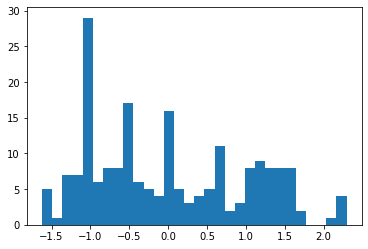

In [71]:
plt.hist(temp,bins=30)

In [58]:
pd.qcut(df['gym'],5)

month
2004-01-01      (28.0, 32.0]
2004-02-01    (21.999, 28.0]
2004-03-01    (21.999, 28.0]
2004-04-01    (21.999, 28.0]
2004-05-01    (21.999, 28.0]
                   ...      
2020-04-01      (32.0, 39.0]
2020-05-01      (32.0, 39.0]
2020-06-01      (39.0, 47.2]
2020-07-01      (39.0, 47.2]
2020-08-01      (39.0, 47.2]
Name: gym, Length: 200, dtype: category
Categories (5, interval[float64]): [(21.999, 28.0] < (28.0, 32.0] < (32.0, 39.0] < (39.0, 47.2] < (47.2, 59.0]]

In [4]:
df_new = df.drop(df.index[df['diet']==100])
df_new.describe()

,diet,gym,finance
count,199.000000,199.000000,199.000000
mean,49.437186,37.341709,48.175879
std,7.126195,9.460915,5.758105
min,34.000000,22.000000,38.000000
25%,44.000000,29.000000,45.000000
50%,49.000000,36.000000,47.000000
75%,54.000000,46.000000,50.500000
max,75.000000,59.000000,76.000000


For more: 
- For missing data, refer [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
- For merging several data sets, refer [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

# References
- [All of Statistics by Larry Wasserman](https://books.google.es/books?hl=en&lr=&id=qrcuBAAAQBAJ&oi=fnd&pg=PR1&ots=0bL32AQEDC&sig=S8P0-J80C5cP0R9KRFakg4irgHs&redir_esc=y#v=onepage&q&f=false)
- [For More in Boxplots](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)